# Exercise: Iris fower dataset

In [1]:
# TASK1 Make a bar plot of the mean sepal sizes for each species
import pandas as pd
%matplotlib inline
import seaborn; seaborn.set()
iris = seaborn.load_dataset('iris')

<Axes: title={'center': 'Mean Sepal Sizes for Each Species'}, xlabel='species'>

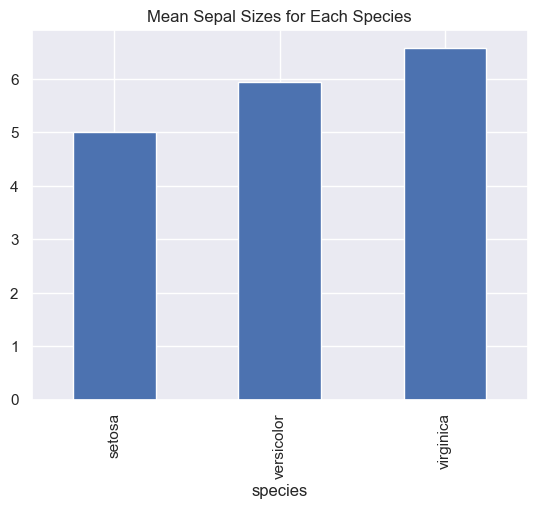

In [2]:
iris.groupby('species')['sepal_length'].mean().plot(kind='bar', title='Mean Sepal Sizes for Each Species')


In [3]:
# Task 2: Find the min, max and mean of petal sizes for each species

# Minimum petal size for each species:
iris.groupby('species')['petal_length'].min()


species
setosa        1.0
versicolor    3.0
virginica     4.5
Name: petal_length, dtype: float64

In [4]:
# Maximum petal size for each species:
iris.groupby('species')['petal_length'].max()


species
setosa        1.9
versicolor    5.1
virginica     6.9
Name: petal_length, dtype: float64

In [5]:
# Mean petal size for each species:
iris.groupby('species')['petal_length'].mean()


species
setosa        1.462
versicolor    4.260
virginica     5.552
Name: petal_length, dtype: float64

# Passengers of the Titanic

In [6]:
import numpy as np
import pandas as pd
import seaborn

In [7]:
t = seaborn.load_dataset('titanic')
t.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
#1) How many passengers are described in the data set?
num_passengers = t.shape[0]
print(num_passengers)

891


In [9]:
#2) How many distinct values are in who column?
distinct_values = t['who'].nunique()
print(distinct_values)

3


In [10]:
#3) How many missing values do you fnd in each data column?
missing_values = t.isna().sum()
print(missing_values)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [11]:
#4) Does the data contain passengers over 60 old? How many?

# Filter passengers over 60 years old
passengers_over_60 = t[t['age'] > 60]

# Count the number of passengers over 60 years old
count_passengers_over_60 = len(passengers_over_60)

print("Number of passengers over 60 years old:", count_passengers_over_60)


Number of passengers over 60 years old: 22


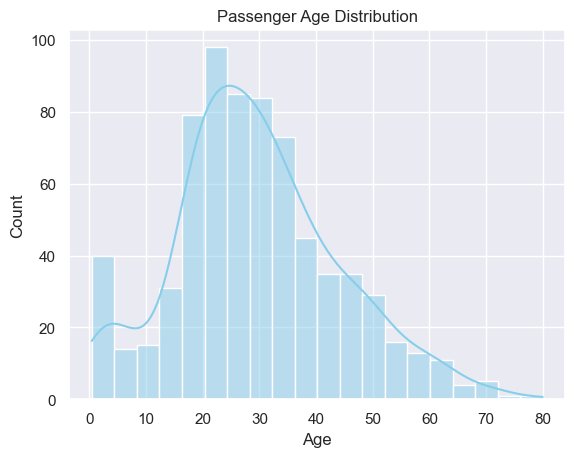

In [14]:
#5) What is the passenger age distribution?
# Create a histogram of passenger ages
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data=t, x='age', kde=True, color='skyblue')

# Set plot labels and title
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Passenger Age Distribution")

# Show the plot
plt.show()









In [15]:
#6) What are the 3-quantiles of the passenger age distribution?
tertiles = t['age'].quantile([1/3, 2/3])

# Display the 3-quantiles
print(tertiles)

0.333333    23.0
0.666667    34.0
Name: age, dtype: float64


In [16]:
#7) How will you drop all passengers with no embarked data?
t.dropna(subset=['embarked'], inplace=True)


In [18]:
#8) What is the average, minimum, and maximum fares paid by the passengers?

# Calculate the average fare
average_fare = t['fare'].mean()

# Calculate the minimum fare
minimum_fare = t['fare'].min()

# Calculate the maximum fare
maximum_fare = t['fare'].max()

# Print the results
print("Average Fare:", average_fare)
print("Minimum Fare:", minimum_fare)
print("Maximum Fare:", maximum_fare)


Average Fare: 32.09668087739032
Minimum Fare: 0.0
Maximum Fare: 512.3292


In [20]:
#9) What are the proportions of passengers in different classes?
# Calculate the proportions of passengers in different classes
class_proportions = t['class'].value_counts(normalize=True)

# Display the proportions
print(class_proportions)

Third     0.552306
First     0.240720
Second    0.206974
Name: class, dtype: float64


In [21]:
#10) What is the female to male ratio in each travel class?
# Group the data by class and gender and count the number of passengers in each group
class_gender_counts = t.groupby(['class', 'sex']).size()

# Unstack the multi-indexed series to create a DataFrame
class_gender_counts = class_gender_counts.unstack()

# Calculate the female-to-male ratio in each class
class_gender_ratios = class_gender_counts['female'] / class_gender_counts['male']

# Display the female-to-male ratio in each class
print(class_gender_ratios)

class
First     0.754098
Second    0.703704
Third     0.414986
dtype: float64


In [22]:
#11) Are the survival rates of male and female passengers different?
from scipy.stats import chi2_contingency


# Create a contingency table for survival by gender
contingency_table = pd.crosstab(t['sex'], t['survived'])

# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Display the results
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")

# Determine statistical significance
alpha = 0.05
if p < alpha:
    print("There is a statistically significant difference in survival rates between male and female passengers.")
else:
    print("There is no statistically significant difference in survival rates between male and female passengers.")


Chi-squared statistic: 258.4266104463763
P-value: 3.7799096665576e-58
There is a statistically significant difference in survival rates between male and female passengers.


C:\Users\prash\AppData\Local\Temp\ipykernel_9472\3363560712.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='class', y='survived', data=t, ci=None)


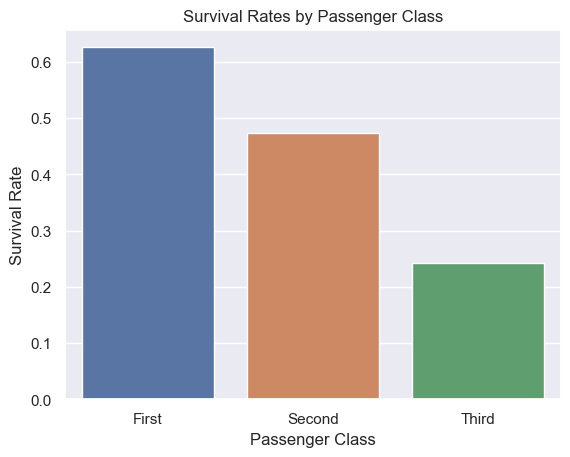

In [23]:
#12) Are the survival rates of frst, second, and third class passengers different?

# Create a bar plot of survival rates for each class
sns.barplot(x='class', y='survived', data=t, ci=None)

# Set plot labels and title
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rates by Passenger Class')

# Show the plot
plt.show()

In [24]:
#13) How can one print a table with number of survivors and average fare for each gender and cabin?

# Group the data by 'sex' and 'class' (cabin) and aggregate the count of survivors and the mean fare
result = t.groupby(['sex', 'class']).agg({'survived': 'sum', 'fare': 'mean'})

# Rename the columns for clarity
result = result.rename(columns={'survived': 'Survivors', 'fare': 'Average Fare'})

# Reset the index to have a cleaner representation
result = result.reset_index()

# Display the resulting table
print(result)

      sex   class  Survivors  Average Fare
0  female   First         89    106.693750
1  female  Second         70     21.970121
2  female   Third         72     16.118810
3    male   First         45     67.226127
4    male  Second         17     19.741782
5    male   Third         47     12.661633
